<a href="https://colab.research.google.com/github/mtbr39/discord_app/blob/master/ipynb/mnist_simple--2layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mnistデータの読み込み
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
  #x_train:学習用画像 y_train:学習用ラベル x_test:検証用画像 y_test:検証用ラベル

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
#データの前処理
from keras.utils.np_utils import to_categorical

#画像を一次元化
x_train = x_train.reshape(60000, 784)   #28*28=784:mnist画像のサイズ
x_test = x_test.reshape(10000, 784)

#画素を0~1の範囲に変換(正規化)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 正解ラベルをone-hot-encodeing
y_train = to_categorical(y_train, 10)   #One Hot Encording:学習しやすいようカテゴリ値を01で表現すること
y_test = to_categorical(y_test, 10)

In [ ]:
#モデルを構築
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))  #活性化関数：ReLU関数
model.add(Dense(10, activation='softmax'))              #活性化関数：softmax関数

model.compile(optimizer='rmsprop',              #optimizer: 最適化手法
              loss='categorical_crossentropy',  #loss:      損失関数
              metrics=['accuracy'])             #metrics:   評価関数

In [ ]:
#モデルにデータを学習させる
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train,
            batch_size=100,   #勾配更新ごとのサンプル数
            epochs=12,        #訓練データ配列の反復回数
            verbose=1)        #進行状況の表示モード

Epoch 1/12
600/600 [==============================] - 2s 3ms/step - loss: 0.3608 - accuracy: 0.9025
Epoch 2/12
600/600 [==============================] - 2s 3ms/step - loss: 0.1849 - accuracy: 0.9469
Epoch 3/12
600/600 [==============================] - 2s 3ms/step - loss: 0.1386 - accuracy: 0.9602
Epoch 4/12
600/600 [==============================] - 2s 3ms/step - loss: 0.1121 - accuracy: 0.9669
Epoch 5/12
600/600 [==============================] - 2s 3ms/step - loss: 0.0949 - accuracy: 0.9722
Epoch 6/12
600/600 [==============================] - 2s 3ms/step - loss: 0.0827 - accuracy: 0.9761
Epoch 7/12
600/600 [==============================] - 2s 3ms/step - loss: 0.0728 - accuracy: 0.9790
Epoch 8/12
600/600 [==============================] - 2s 3ms/step - loss: 0.0649 - accuracy: 0.9808
Epoch 9/12
600/600 [==============================] - 2s 3ms/step - loss: 0.0587 - accuracy: 0.9833
Epoch 10/12
600/600 [==============================] - 2s 3ms/step - loss: 0.0535 - accuracy: 0.9848

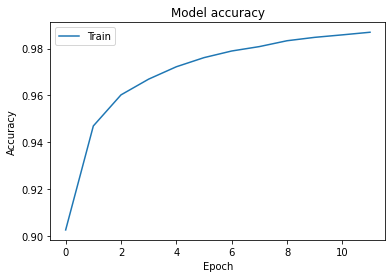

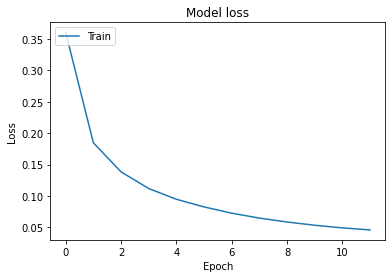

In [ ]:
#学習の履歴の可視化

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
##plt.plot(history.history['val_accuracy'])   #バリデーションデータ:学習の経過を見るのに使われる
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
##plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#モデルを評価する
score = model.evaluate(x_test, y_test)
print(score[0])
print(score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.9764
0.08351444453001022
0.9764000177383423
